## Installation Tensorflow Object Detection API

*** avertissement : la version de Tensorflow recommandée pour utiliser ce script est la v1.15. L'API Object detection n'a pas encore été mise à jour pour fonctionner sur TF2.0 (may 2020)***

au préalable : 

créer un nouveau dossier dans son Google Drive perso, le nommer 'TFConfig'

configurer ce notebook sur GPU (dans Execution/modifier le type)

connection au dossier TFConfig

In [0]:
from os.path import join
from google.colab import drive
 
ROOT = "/content/drive"
drive.mount(ROOT)
 
PROJ = "My Drive/TFConfig" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
 
%cd ~/content
%cd drive/My Drive/TFConfig

In [0]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 32675 (delta 0), reused 9 (delta 0), pack-reused 32666
Receiving objects: 100% (32675/32675), 511.55 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (20798/20798), done.
Checking out files: 100% (3174/3174), done.


In [0]:
%cd ~
%cd /content
%cd drive/My Drive/TFConfig/models/research

!protoc object_detection/protos/*.proto --python_out=.

/root
/content
/content/drive/My Drive/TFConfig/models/research


In [0]:
%cd ~
%cd /content
%cd drive/My Drive/TFConfig/

import os
os.environ['PYTHONPATH'] += ':/content/drive/My Drive/TFConfig/models/research/:/content/drive/My Drive/TFConfig/models/research/slim/'
os.environ['PYTHONPATH'] += ':/content/drive/My Drive/TFConfig/models/research/:/content/drive/My Drive/TFConfig/models/research/object_detection/'
!python models/research/object_detection/builders/model_builder_test.py
 
# Change the directory path
 
%cd models/research/object_detection

/root
/content
/content/drive/My Drive/TFConfig
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_cr

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf


In [0]:
# check la version de tensorflow installée
!python -c 'import tensorflow as tf; print(tf.__version__)'  

1.15.0


In [0]:
#importation des librairies
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
 
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

from IPython.display import display
 
sys.path.append("..")
from object_detection.utils import ops as utils_ops

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
 
#if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
#raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')
   
%matplotlib inline
 
from utils import label_map_util
 
from utils import visualization_utils as vis_util

print('imported')

imported


## Script de test d'installation (TF 2.0 ready)

In [0]:
# --- loader
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)

  model_dir = pathlib.Path(model_dir)/"saved_model"

  model = tf.saved_model.load(str(model_dir))
  model = model.signatures['serving_default']

  return model

In [0]:
%cd ~
%cd /content
%cd drive/My Drive/TFConfig/

/root
/content
/content/drive/My Drive/TFConfig


In [0]:
import pathlib


In [0]:
#--- loading Label Map

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [0]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('models/research/object_detection/test_images')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('models/research/object_detection/test_images/image1.jpg'),
 PosixPath('models/research/object_detection/test_images/image2.jpg')]

In [0]:
# --- load an object detection model

model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
detection_model = load_model(model_name)

TypeError: ignored

In [0]:
# --Check the model's input signature, it expects a batch of 3-color images of type uint8: 

print(detection_model.inputs)

NameError: ignored

In [0]:
# --- And retuns several outputs:

detection_model.output_dtypes

NameError: ignored

In [0]:
detection_model.output_shapes

NameError: ignored

In [0]:
# --- Add a wrapper function to call the model, and cleanup the outputs:

def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  output_dict = model(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [0]:
# -- Run it on each test image and show the results:

def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

In [0]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)

NameError: ignored

In [0]:
# test modèle de segmentation Mask RCNN:

model_name = "mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28"
masking_model = load_model("mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28")

727392256/727390102 [==============================] - 12s 0us/step
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
masking_model.output_shapes

{'detection_boxes': TensorShape([None, 100, 4]),
 'detection_classes': TensorShape([None, 100]),
 'detection_masks': TensorShape([None, None, None, None]),
 'detection_scores': TensorShape([None, 100]),
 'num_detections': TensorShape([None])}

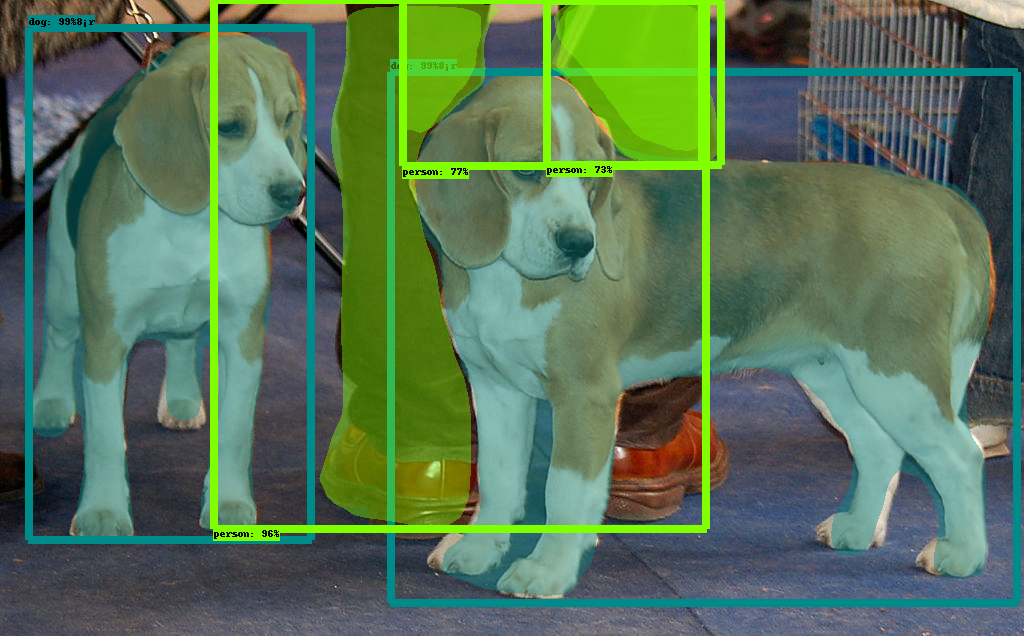

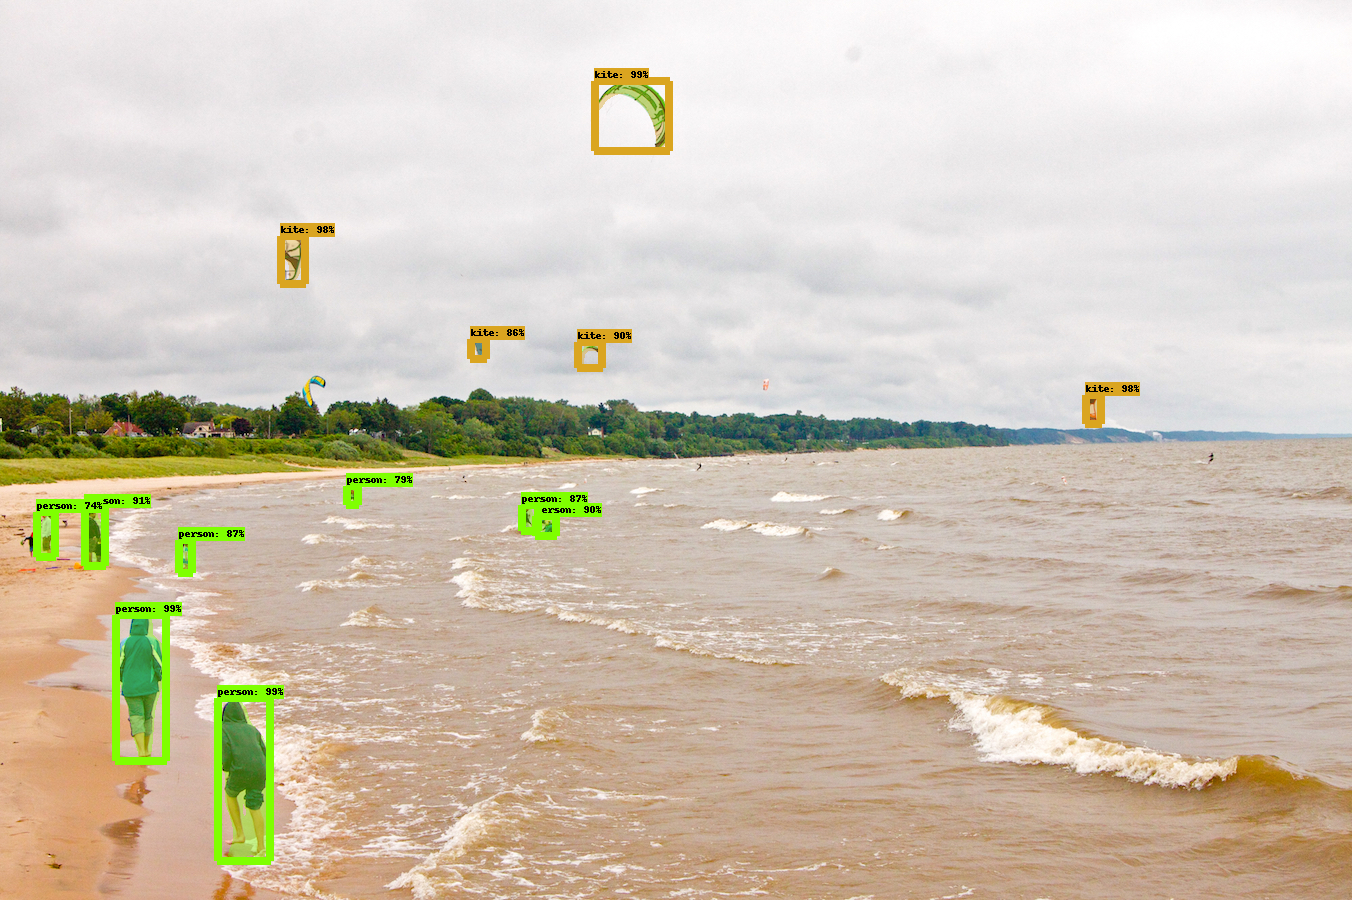

In [0]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(masking_model, image_path)

Si les 2 images s'affichent avec les bounding boxes ci-dessus puis avec les masks, l'installation de Tensorflow s'est bien déroulée.


## Entrainer notre propre dataset

In [0]:
#on vérifie si l'on est toujours bien dans le folder object_detection
!pwd

/content/drive/My Drive/TFConfig/models/research/object_detection


In [0]:
#si l'on n'est pas dans le folder object_detection, executer cette commande:
%cd ~
%cd /content
%cd drive/My Drive/TFConfig/
%cd models/research/object_detection

/root
/content
/content/drive/My Drive/TFConfig
/content/drive/My Drive/TFConfig/models/research/object_detection


### indexation des données (à refaire seulement si modification des données)

In [0]:
# pour convertir nos xml en fichiers csv train_labels et test_labels
! python xml_to_csv.py

Pour générer les fichiers tfrecord (à refaire si changement d'images)

In [0]:
! python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

In [0]:
! python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

créer un dossier "training" dans object_detection
puis y glisser le fichier labelmap.pbtxt

aller chercher le fichier **train.py** dans legacy, le glisser dans object detection


### choix et installation du modèle

dans le dossier "samples" (de object_detection) choisir une config , la configurer et la mettre dans le fichier training

modèle : https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md


dans le lien ci-dessus télécharger le fichier du modèle choisi et le glisser dans le dossier object_detection

### access Tensorboard TF<2.0


In [0]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2019-11-20 14:55:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.156.29.217, 52.20.12.96, 3.214.163.243, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.156.29.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.29’

ngrok-stable-linux- 100%[===================>]  13.13M  6.14MB/s    in 2.1s    

2019-11-20 14:55:13 (6.14 MB/s) - ‘ngrok-stable-linux-amd64.zip.29’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('tensorboard --logdir "/content/drive/My Drive/TFConfig/models/research/object_detection/" --host 0.0.0.0 --port 6006 &')

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://d5667982.ngrok.io


La dernière ligne ci-dessus fait apparaître une url. Ne cliquer dessus qu'après avoir lancer l'entrainement du modèle. Le Tensorboard n'affichera qu'une seule fois l'état du training en cours. 


## Training

In [0]:
! python train.py --logtostderr --train_dir=training --pipeline_config_path=training/ssd_mobilenet_v2_coco.config

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






Instructions for updating:
Use object_detection/model_main.py.
W0131 12:49:45.475513 139809343645568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0131 12:49:45.475733 139809343645568 module_wrapper.py:139] From train.py:86: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0131 12:49:45.476207 139809343645568 module_wrapper.py:139] From /content/drive/My Drive/TFConfig/models/research/object_detection/utils/config_

### récupération du modèle

In [0]:
 # Export du modèle - attention bien indiquer le numéro du dernier checkpoint présent dans le folder "training"
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/ssd_mobilenet_v2_coco.config --trained_checkpoint_prefix training/model.ckpt-3814 --output_directory inference_graph

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W0131 13:15:03.621321 140502912399232 module_wrapper.py:139] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0131 13:15:03.627786 140502912399232 module_wrapper.py:139] From /content/drive/My Drive/TFConfig/models/research/object_detection/exporter.py:389: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0131 13:15:03.628171 140502912399232 module_wrapper.py:139] From /content/drive/My Drive/TFConfig/models/research/object_detection/exporter.py:121: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholde

In [0]:
# export de modèle "quantized" indiquer le numéro du dernier checkpoint
! python export_tflite_ssd_graph.py --pipeline_config_path="training/pipeline.config" --trained_checkpoint_prefix="training/model.ckpt-21111" --output_directory="output" --add_postprocessing_op=true

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W1106 22:11:17.207635 139647985538944 module_wrapper.py:139] From export_tflite_ssd_graph.py:133: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1106 22:11:17.212958 139647985538944 module_wrapper.py:139] From /content/drive/My Drive/TFConfig/models/research/object_detection/export_tflite_ssd_graph_lib.py:193: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1106 22:11:17.213490 139647985538944 module_wrapper.py:139] From /content/drive/My Drive/TFConfig/models/research/object_detection/export_tflite_ssd_graph_lib.py:237: The name tf.placeholder is depreca

### convert to Quantized TFLITE model

In [0]:
%cd ~
%cd /content
%cd drive/My Drive/TFConfig/
%cd models/research/object_detection

/root
/content
/content/drive/My Drive/TFConfig
/content/drive/My Drive/TFConfig/models/research/object_detection


In [0]:
# conversion en format tflite (quantized)
! tflite_convert --output_file=output/output_tflite_graph.tflite --graph_def_file=output/tflite_graph.pb --inference_type=QUANTIZED_UINT8 --input_arrays=normalized_input_image_tensor --output_arrays="TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3" --mean_values 128 --std_dev_values=128 --input_shapes=1,300,300,3 --change_concat_input_ranges=false --allow_nudging_weights_to_use_fast_gemm_kernel=true --allow_custom_ops

2019-11-06 22:12:36.319240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-06 22:12:36.337966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-11-06 22:12:36.338900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2019-11-06 22:12:36.339161: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2019-11-06 22:12:36.341063: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2019-11-06 22:12:36.342380: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libc

In [0]:
!pwd

In [0]:
#installation du compiler pour optimiser le modèle tflite et le faire tourner sur raspberry pi + edgetpu

! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu

In [0]:
! edgetpu_compiler output/output_tflite_graph.tflite
#si le fichier au format '_edgetpu.tflite' ne se créé pas dans le dossier output, executer la commande dans ubuntu
# NB: ce compiler ne fonctionne que sur Linux